# Model Selection In-Class Exercise

In this example, you will a linear model to data and select the model order by model order selection.  First load the standard packages.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the Data

The data in this exercise is completely synthetic.  You can load it with the following commmand.

In [17]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit04_model_sel/synth_data.p'
fn_dst = 'synth_data.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    x,y = pickle.load(fp)

File synth_data.p is already downloaded


Plot the data `y` vs. `x` using a scatter plot. 

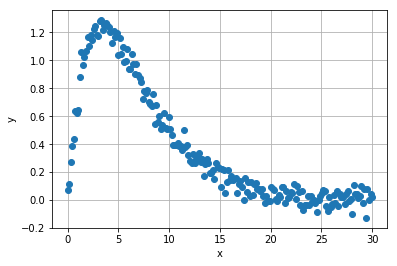

In [18]:
# TODO
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

## Fit the Data

We will now try to fit the data.  First, split the data into training and test.  You can use the `train_test_split()` method in the `sklearn` package.

In [19]:
# TODO
# xtr, xts, ytr, yts = train_test_split(...)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)



Now try to fit a linear model to the data.  You can pick any linear model with a variable number `d` of basis functions.  For example, you can use the polynomials up to degree `d-1`.  

For each model order `d`:
* Fit the model on the training data
* Test the model on the test data

Plot the test error vs. `d`.  Select the model order `dopt` with the lowest test error.

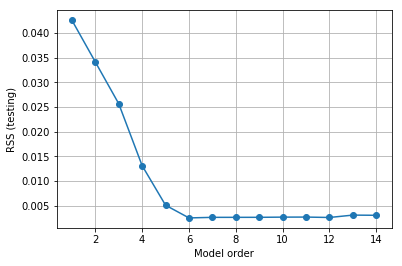

In [20]:
# TODO
import numpy.polynomial.polynomial as poly

d = 15

dtest = np.array(range(1,15))
RSSte = []
for d in dtest:
    
    # Fit data
    beta_hat = poly.polyfit(X_train,y_train,d)
    
    # Measure RSS on training data
    yhat = poly.polyval(X_test,beta_hat)
    RSSd = np.mean((yhat-y_test)**2)
    RSSte.append(RSSd)
    
plt.plot(dtest,RSSte,'o-')
plt.xlabel('Model order')
plt.ylabel('RSS (testing)')
plt.grid()
    

Select the optimal model order `dopt`.  Re-train the model for that model order.  On one plot:
* Plot the predicted value `yhat` vs. `x` for your model for `x in [0,35]`
* Plot a scatter plot of the test data `xts` vs. `yts`

Does your model fit the test data well?
Does it extrapolate reasonably in the range `x >= 30`?

6


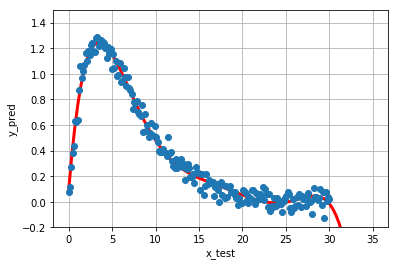

In [31]:
# TODO
# Fit data
dopt=RSSte.index(min(RSSte))+1
print(dopt)

beta_hat = poly.polyfit(X_train,y_train,dopt)

y_pred = poly.polyval(X_test, beta_hat)
# Measure RSS on training data

# Plot true function
xp = np.linspace(0, 35, 100)
yp = poly.polyval(xp,beta_hat)
plt.ylim(-0.2,1.5)
plt.plot(xp,yp,'r-',linewidth=3)

plt.plot(x,y,'o')
plt.xlabel('x_test')
plt.ylabel('y_pred')
plt.grid(True)

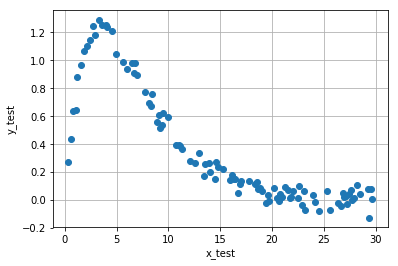